# TDI-Project Proposal;  March 31, 2021

Compiled by: ***Alem H Fitwi***, 
      - GA-Data Analyst (using OracleSQL, SAS, SQLite, and Python3)
      - PhD Candidate in Computer Engineering
   
   Reserach Areas:        
        <ul>
            <li>Privacy in Mechanical Surveillance Systems,</li>
            <li>Machine Learning, Deep Learning,</li>
            <li>Networking (Edge Computing) and IoD</li>            
         </ul>
    Binghamton University-State University of New York    
                        Since August 23, 2017 

# 1. Brief Project Description

"***Telemarketing*** is the marketing of goods or services by means of telephone calls, typically unsolicited, to potential customers. It is a form of marketing that allows companies to connect with potential customers via telephone. Companies will sometimes use cold calling as a means to find customers. Historically, telemarketing consisted of companies making telephone calls to existing or potential customers. With new technology, telemarketing has expanded to include video conferencing calls as well, although those are typically conducted with existing customers. Telemarketing is often used to try to sell a product or service, but it can also take the form of surveys or information gathering. For instance, political campaigns use telemarketing heavily prior to elections to inquire about voting preferences. When companies call new customers, the activity is referred to as cold calling, which means the consumer has not purchased from the company before nor have they requested a call from the company. Companies can buy a list of potential customers to call from a list service, which will provide a list of consumers who have similar interests or purchasing histories who fit the company's target market."

There are many industries that rely heavily on telemarketing, such as:
- Cable and Internet services
- Home security systems
- Financial services
- Vacation and time share
- Charitable organizations

My proposed project is therefore about modeling a machine learning model that helps a certain company leverage and use the findings of a test over telemarketing compaign on its existing business cutomers. The prime focus here, as an example, is an office supply store that has conducted telemarketing compaign with its existing customers. This project tries to find the best ways to to maximize the companies profit in the next telemarketing campaign by developing a model based on prior campaign sales and other related historical data.

### 1.1 Project Objective
- Profile the customers that respond to the compaign to make the company aware of who its typical customer is
- Develop models that will allow the company to use the results of the campaign to target future, similar campaigns.
- SHow the financial value of your models

### 1.2 Deliverables
- A model that identifies the right cutomers that must be contacted
- A clear gain chart showing the financial contributions of the model results

### 1.3 Financial Constants and Formulae
- Gross margin on sales = 20%
- Comapign Cost = $\$40$
- Transaction Cost = $\$5$
- Expected Profit
$$E(Profit)\ =\ 0.2*prob(Sale)*Est(Transaction Size)-\$5*Prob(Sale)-*\$40$$

### 1.4 Methodology

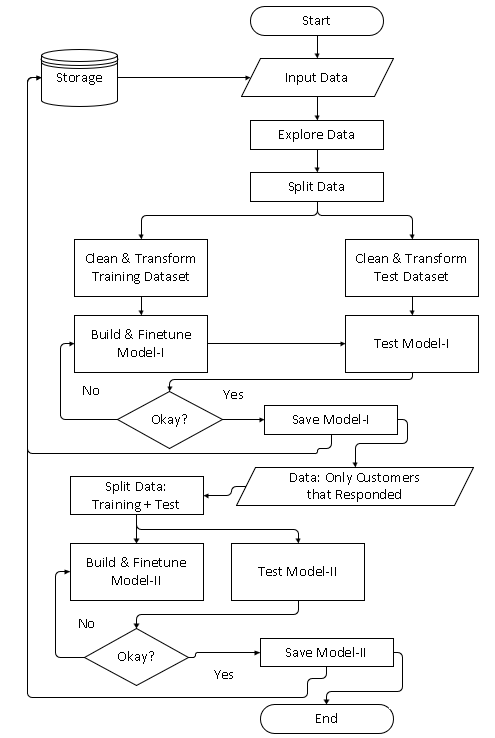

In [519]:
from IPython.display import Image
Image('./design.png')

### 1.5 Dataset

https://github.com/ahfitwi/TDI_June_27_2020/blob/master/telemarketingOfficeSupplyCampaign%20Results.xlsx

<a href="https://github.com/ahfitwi/TDI_June_27_2020/blob/master/telemarketingOfficeSupplyCampaign%20Results.xlsx">Link to Dataset</a>

# 2. Preliminary Data Processing

In [634]:
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

### 2.1 Dataset Inputting

In [521]:
# Read in all sheets in the source excel file
sheets = pd.read_excel('telemarketingOfficeSupplyCampaign Results.xlsx',\
                       sheet_name =['Campaign Results', 'Data Dictionary'])
data = sheets['Campaign Results']
description = sheets['Data Dictionary']

#### Column Descriptions

In [522]:
description

,Customer Number,A unique company identifier
0,Campaign Period Sales,Total $ purchased during the campaign period
1,Historical Sales Volume,Total historical $ purchased
2,Date of First Purchase,Date of first transaction
3,Number of Prior Year Transactions,The number of transactions in the year prior t...
4,Do Not Direct Mail Solicit,Does not allow promotional mail
5,Do Not Email,Does not allow promotional email
6,Do Not Telemarket,Does not allow promotional calls
7,Repurchase Method,Method of last purchase prior to the campaign
8,Last Transaction Channel,Sales channel of last purchase prior to the ca...
9,Desk,Prior purchase of this item


#### Actual Data

In [523]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,"86,734.0000",238.7048,"146,803.4286",1968-10-01,15.0000,0.0000,0.0000,0.0000,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,"97,098.0000",281.6800,"439,984.1600",1981-06-15,22.0000,0.0000,0.0000,0.0000,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,"100,836.0000",432.8571,"970,465.7143",1962-11-01,19.0000,0.0000,0.0000,0.0000,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,"116,390.0000",0.0000,"230,193.6000",1983-06-01,17.0000,0.0000,0.0000,0.0000,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,"127,914.0000","1,370.1667","27,403.3333",1987-07-15,21.0000,0.0000,0.0000,0.0000,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN


### 2.2 Exploratory Data Analysis (EDA)

#### Check shape, columns, and info

In [524]:
data.shape

(16173, 21)

In [525]:
data.columns

Index(['Customer Number', 'Campaign Period Sales', 'Historical Sales Volume',
       'Date of First Purchase', 'Number of Prior Year Transactions',
       'Do Not Direct Mail Solicit', 'Do Not Email', 'Do Not Telemarket',
       'Repurchase Method', 'Last Transaction Channel', 'Desk',
       'Executive Chair', 'Standard Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office Supplies', 'Number of Employees',
       'Language'],
      dtype='object')

In [526]:
columns =['Customer_Number', 'Campaign_Period_Sales', 'Historical_Sales_Volume',
       'Date_of_First_Purchase', 'Number_of_Prior_Year_Transactions',
       'Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 'Do_Not_Telemarket',
       'Repurchase_Method', 'Last_Transaction_Channel', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language']
data.columns =columns

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer_Number                      16172 non-null float64
Campaign_Period_Sales                16172 non-null float64
Historical_Sales_Volume              16172 non-null float64
Date_of_First_Purchase               16172 non-null datetime64[ns]
Number_of_Prior_Year_Transactions    16172 non-null float64
Do_Not_Direct_Mail_Solicit           16172 non-null float64
Do_Not_Email                         16172 non-null float64
Do_Not_Telemarket                    16172 non-null float64
Repurchase_Method                    16172 non-null object
Last_Transaction_Channel             15730 non-null object
Desk                                 16173 non-null object
Executive_Chair                      16171 non-null object
Standard_Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

####  Check empty or not a number (NaN) cells
- isna().sum()
- isnull().sum()

In [528]:
data.isna().sum()

Customer_Number                         1
Campaign_Period_Sales                   1
Historical_Sales_Volume                 1
Date_of_First_Purchase                  1
Number_of_Prior_Year_Transactions       1
Do_Not_Direct_Mail_Solicit              1
Do_Not_Email                            1
Do_Not_Telemarket                       1
Repurchase_Method                       1
Last_Transaction_Channel              443
Desk                                    0
Executive_Chair                         2
Standard_Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office_Supplies                         1
Number_of_Employees                     3
Language                             4472
dtype: int64

#### Clean and Impute the Data

In [529]:
data = data[(data['Campaign_Period_Sales']>0) == True]
data['Language'] = data['Language'].fillna(data['Language'].mode()[0])
data['Number_of_Employees'] = data['Number_of_Employees'].\
            fillna(data['Number_of_Employees'].mode()[0])

In [530]:
# Handle whitespaces
# Number_of_Employees has 4379-3355 white-space cells
data['Number_of_Employees'] = data['Number_of_Employees'].replace(r'^\s*$',\
                                                np.nan, regex=True)

In [531]:
# Replace whitespaces with average numbe rof emplyees
# This is just an example, you can employ another strategy or drop it
lst = data['Number_of_Employees'].tolist()

lst1 = []
lst2 = []
for ls in lst:
    if type(ls) == str:
        tmp = ls.split('-')
        if len(tmp)>1:
            lst1.append((int(tmp[0]) + int(tmp[1]))/2) 
            lst2.append((int(tmp[0]) + int(tmp[1]))/2) 
        else:        
            lst1.append(int(ls[0]))  
            lst2.append(int(ls[0]))  
    else:
        lst1.append(ls)
mean = np.mean(lst2)

data['Number_of_Employees'] = lst1
data['Number_of_Employees'] = data['Number_of_Employees'].fillna(mean)

In [532]:
data['Insurance']=data['Insurance'].apply(lambda x: '0' if x == 'YY' else x)

In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379 entries, 0 to 16165
Data columns (total 21 columns):
Customer_Number                      4379 non-null float64
Campaign_Period_Sales                4379 non-null float64
Historical_Sales_Volume              4379 non-null float64
Date_of_First_Purchase               4379 non-null datetime64[ns]
Number_of_Prior_Year_Transactions    4379 non-null float64
Do_Not_Direct_Mail_Solicit           4379 non-null float64
Do_Not_Email                         4379 non-null float64
Do_Not_Telemarket                    4379 non-null float64
Repurchase_Method                    4379 non-null object
Last_Transaction_Channel             4276 non-null object
Desk                                 4379 non-null object
Executive_Chair                      4379 non-null object
Standard_Chair                       4379 non-null object
Monitor                              4379 non-null object
Printer                              4379 non-null object
Compute

#### Statistics

In [534]:
data.describe()

,Customer_Number,Campaign_Period_Sales,Historical_Sales_Volume,Number_of_Prior_Year_Transactions,Do_Not_Direct_Mail_Solicit,Do_Not_Email,Do_Not_Telemarket,Number_of_Employees
count,"4,379.0000","4,379.0000","4,379.0000","4,379.0000","4,379.0000","4,379.0000","4,379.0000","4,379.0000"
mean,"20,231,852.0838",908.4425,"616,560.0225",16.3142,0.1126,0.2144,0.1032,33.3915
std,"18,151,932.3766","1,146.4166","898,232.7292",8.8510,0.3161,0.4105,0.3043,59.2325
min,"86,734.0000",6.5714,"1,319.3143",1.0000,0.0000,0.0000,0.0000,3.0000
25%,"8,874,582.5000",225.7181,"170,221.6000",11.0000,0.0000,0.0000,0.0000,8.0000
50%,"17,981,444.0000",375.8114,"354,429.6000",17.0000,0.0000,0.0000,0.0000,8.0000
75%,"26,963,264.5000","1,213.7233","721,520.8571",20.5000,0.0000,0.0000,0.0000,33.3915
max,"166,911,510.0000","8,936.8500","16,483,479.0400",313.0000,1.0000,1.0000,1.0000,300.5000


#### Correlations

In [535]:
data.corr()

,Customer_Number,Campaign_Period_Sales,Historical_Sales_Volume,Number_of_Prior_Year_Transactions,Do_Not_Direct_Mail_Solicit,Do_Not_Email,Do_Not_Telemarket,Number_of_Employees
Customer_Number,1.0000,0.2743,0.0543,-0.0686,0.0281,0.0055,0.0317,0.0089
Campaign_Period_Sales,0.2743,1.0000,0.4047,0.0448,0.1086,0.0570,0.1002,0.1356
Historical_Sales_Volume,0.0543,0.4047,1.0000,0.1556,-0.0024,-0.0085,-0.0137,0.2193
Number_of_Prior_Year_Transactions,-0.0686,0.0448,0.1556,1.0000,-0.0204,-0.0230,-0.0167,0.0054
Do_Not_Direct_Mail_Solicit,0.0281,0.1086,-0.0024,-0.0204,1.0000,0.5656,0.9406,-0.0022
Do_Not_Email,0.0055,0.0570,-0.0085,-0.0230,0.5656,1.0000,0.5854,-0.0223
Do_Not_Telemarket,0.0317,0.1002,-0.0137,-0.0167,0.9406,0.5854,1.0000,-0.0059
Number_of_Employees,0.0089,0.1356,0.2193,0.0054,-0.0022,-0.0223,-0.0059,1.0000


### 2.3 Encoding Categorical Fields

In [536]:
#Responses
data.Desk = data.Desk.apply(lambda x:\
          1.0 if x == 'Y' else(0 if x=='N' else x))
data.Executive_Chair = data.Executive_Chair.apply(lambda x:\
                 1.0 if x == 'Y' else(0.0 if x=='N' else x))   
data.Standard_Chair = data.Standard_Chair.apply(lambda x:\
                    1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Monitor = data.Monitor.apply(lambda x:\
             1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Printer = data.Printer.apply(lambda x:\
             1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Computer = data.Computer.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Insurance = data.Insurance.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Toner = data.Toner.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Office_Supplies = data.Office_Supplies.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))

In [537]:
# Create dummy variables for languages
fields=['Language']
for var in fields:
    field_lst ='var'+'_'+var
    field_lst = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(field_lst)
    data = data1
data.head()

,Customer_Number,Campaign_Period_Sales,Historical_Sales_Volume,Date_of_First_Purchase,Number_of_Prior_Year_Transactions,Do_Not_Direct_Mail_Solicit,Do_Not_Email,Do_Not_Telemarket,Repurchase_Method,Last_Transaction_Channel,...,Language_Hindi,Language_Italian,Language_Japanese,Language_Pashto,Language_Polish,Language_Portuguese,Language_Russian,Language_Spanish,Language_Thai,Language_Vietnamese
0,"86,734.0000",238.7048,"146,803.4286",1968-10-01,15.0000,0.0000,0.0000,0.0000,AUTO RENEW,AUTO RENEW,...,0,0,0,0,0,0,0,0,0,0
1,"97,098.0000",281.6800,"439,984.1600",1981-06-15,22.0000,0.0000,0.0000,0.0000,NOTICE,MAIL,...,0,0,0,0,0,0,0,0,0,0
2,"100,836.0000",432.8571,"970,465.7143",1962-11-01,19.0000,0.0000,0.0000,0.0000,NOTICE,MAIL,...,0,0,0,0,0,0,0,0,0,0
4,"127,914.0000","1,370.1667","27,403.3333",1987-07-15,21.0000,0.0000,0.0000,0.0000,NOTICE,BRANCH (PHONE),...,0,0,0,0,0,0,0,0,0,0
5,"148,529.0000",308.4190,"182,584.0762",1979-05-15,16.0000,0.0000,0.0000,0.0000,NOTICE,MAIL,...,0,0,0,0,0,0,0,0,0,0


In [538]:
data = data.fillna(0)
col2 = ['Customer_Number', 'Campaign_Period_Sales', 'Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions', 'Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 'Do_Not_Telemarket', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language', 'Language_Arabic', 'Language_Chinese',
       'Language_English', 'Language_French', 'Language_German',
       'Language_Greek', 'Language_Hebrew', 'Language_Hindi',
       'Language_Italian', 'Language_Japanese', 'Language_Pashto',
       'Language_Polish', 'Language_Portuguese', 'Language_Russian',
       'Language_Spanish', 'Language_Thai', 'Language_Vietnamese']
data = data[col2]

### 2.4 Visualization

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


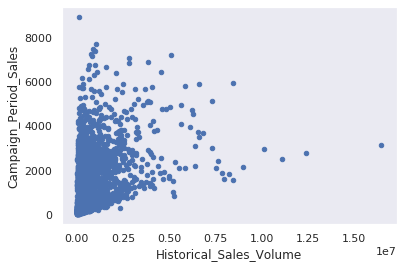

In [539]:
import matplotlib.pyplot as plt
data.plot.scatter(x="Historical_Sales_Volume", y="Campaign_Period_Sales")
plt.ylabel('Campaign_Period_Sales')
plt.xlabel('Historical_Sales_Volume')
plt.grid()
plt.show(block=True);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


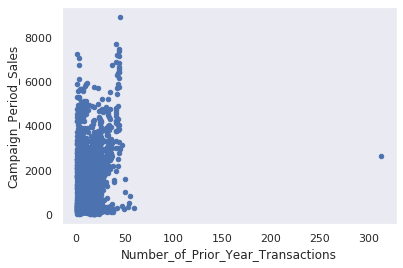

In [540]:
import matplotlib.pyplot as plt
data1.plot.scatter(x="Number_of_Prior_Year_Transactions", y="Campaign_Period_Sales")
plt.ylabel('Campaign_Period_Sales')
plt.xlabel('Number_of_Prior_Year_Transactions')
plt.grid()
plt.show(block=True);

# 3. Data Preprocessing

In [541]:
col4 = ['Campaign_Period_Sales', 'Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions','Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 'Do_Not_Telemarket', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language_Arabic', 'Language_Chinese','Language_English', 'Language_French', 'Language_German',
       'Language_Greek', 'Language_Hebrew', 'Language_Hindi',
       'Language_Italian', 'Language_Japanese', 'Language_Pashto',
       'Language_Polish', 'Language_Portuguese', 'Language_Russian',
       'Language_Spanish', 'Language_Thai', 'Language_Vietnamese']
data1 = data[col4]
data1 = data1.astype(np.float64)
data1['Insurance'] = data1['Insurance'].fillna(1.0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4379 entries, 0 to 16165
Data columns (total 33 columns):
Campaign_Period_Sales                4379 non-null float64
Historical_Sales_Volume              4379 non-null float64
Number_of_Prior_Year_Transactions    4379 non-null float64
Do_Not_Direct_Mail_Solicit           4379 non-null float64
Do_Not_Email                         4379 non-null float64
Do_Not_Telemarket                    4379 non-null float64
Desk                                 4379 non-null float64
Executive_Chair                      4379 non-null float64
Standard_Chair                       4379 non-null float64
Monitor                              4379 non-null float64
Printer                              4379 non-null float64
Computer                             4379 non-null float64
Insurance                            4379 non-null float64
Toner                                4379 non-null float64
Office_Supplies                      4379 non-null float64
Number_

In [542]:
col5 = ['Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions','Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 'Do_Not_Telemarket', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language_Arabic', 'Language_Chinese','Language_English', 'Language_French', 'Language_German',
       'Language_Greek', 'Language_Hebrew', 'Language_Hindi',
       'Language_Italian', 'Language_Japanese', 'Language_Pashto',
       'Language_Polish', 'Language_Portuguese', 'Language_Russian',
       'Language_Spanish', 'Language_Thai', 'Language_Vietnamese']
X = data1[col5]
Y = data1['Campaign_Period_Sales']

In [543]:
X.shape

(4379, 32)

In [544]:
Y.shape

(4379,)

### 3.1 Feature Selection

### ***(a) Using P-value: Statsmodels***
We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.
$$y = mX + c$$

In [545]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf

X1 = np.asarray(X)
Y1 = np.asarray(Y)
X_constant = sm.add_constant(X1)
model = sm.OLS(Y1, X_constant)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:13:26   Log-Likelihood:                -35154.
No. Observations:                4379   AIC:                         7.037e+04
Df Residuals:                    4347   BIC:                         7.058e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1338.1958    101.387     13.199      0.000    1139.427    1536.965
x1             0.0003   1.38e-05     21.853      0.000       0.000       0.000
x2             6.1745      1.301      4.747      0.000       3.624       8.725
x3           190.7742    106.195      1.796      0.072     -17.422     398.970
x4            28.1822     33.991      0.829      0.407     -38.457      94.821
x5           -98.7576    112.257     -0.880      0.379    -318.838     121.323
x6            55.2727     48.390      1.142      0.253     -39.596     150.142
x7           179.3468     40.716      4.405      0.000      99.523     259.171
x8           255.8894     80.331      3.185      0.001      98.400     413.379
x9           692.7579     96.031      7.214      0.000     504.488     881.028
x10          167.5800     71.694      2.337      0.019      27.023     308.137
x11          502.6053     97.799      5.139      0.000     310.869     694.341
x12          122.0581     36.004      3.390      0.001      51.473     192.644
x13          145.3812     43.687      3.328      0.001      59.733     231.030
x14        -1501.4419     26.776    -56.074      0.000   -1553.936   -1448.947
x15            0.4828      0.196      2.461      0.014       0.098       0.867
x16          131.0278    328.567      0.399      0.690    -513.131     775.187
x17          159.7626    302.744      0.528      0.598    -433.771     753.296
x18          249.0613     96.683      2.576      0.010      59.513     438.609
x19          129.3586    505.679      0.256      0.798    -862.031    1120.748
x20          249.0442    363.862      0.684      0.494    -464.311     962.399
x21          238.5762    302.880      0.788      0.431    -355.223     832.375
x22           94.3785    302.660      0.312      0.755    -498.989     687.746
x23           45.6577    329.025      0.139      0.890    -599.398     690.714
x24           45.3280    253.140      0.179      0.858    -450.956     541.612
x25         -145.9677    364.378     -0.401      0.689    -860.335     568.400
x26          350.7603    708.880      0.495      0.621   -1039.006    1740.527
x27         -591.7894    506.118     -1.169      0.242   -1584.038     400.459
x28         -189.8479    242.450     -0.783      0.434    -665.174     285.478
x29          269.2417    328.351      0.820      0.412    -374.493     912.976
x30          -29.2956    187.670     -0.156      0.876    -397.225     338.634
x31          -37.1019    715.777     -0.052      0.959   -1440.390    1366.186
x32          370.0014    505.913      0.731      0.465    -621.846    1361.849
==============================================================================
Omnibus:                     1846.419   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26383.327
Sk

### ***(b) Using Correlation Matrix***

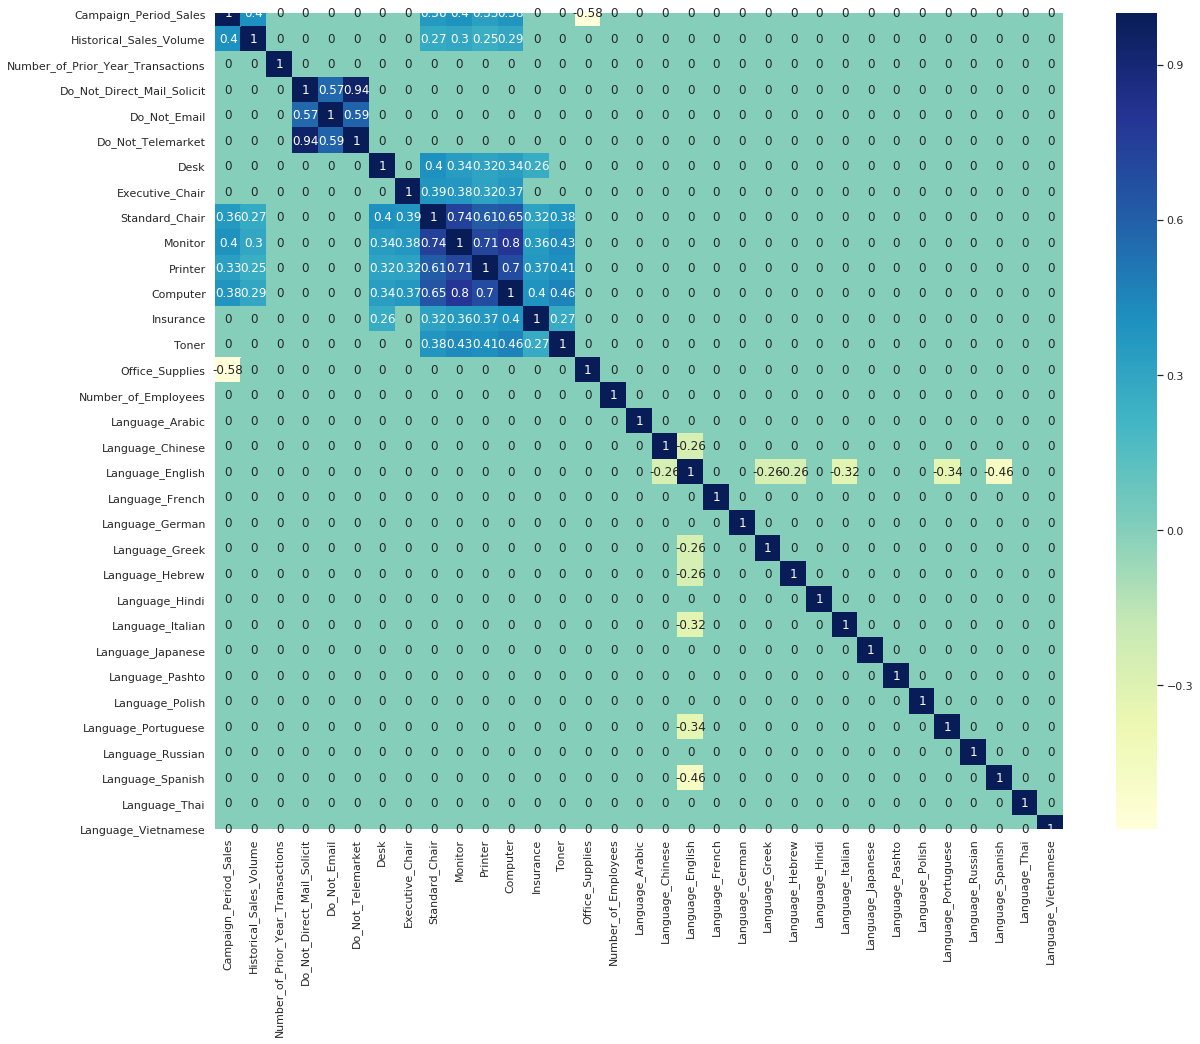

In [546]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = data1.corr()
corr_matrix[np.abs(corr_matrix) < 0.25] = 0
plt.figure(figsize=(19,15))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

### ***(c) Using Eigenvectors***

In [547]:
eigenvalues, eigenvectors = np.linalg.eig(data1.corr())
pd.options.display.float_format = '{:,.4f}'.format
#With least eigenvalues
pd.Series(eigenvalues).sort_values()

9    0.0000
4    0.0576
5    0.1813
6    0.2680
7    0.3111
8    0.3727
10   0.5225
11   0.6399
13   0.6873
14   0.7284
15   0.8068
16   0.8415
17   0.9177
19   0.9727
21   0.9941
27   1.0005
30   1.0007
31   1.0009
32   1.0010
29   1.0013
28   1.0015
26   1.0027
25   1.0040
24   1.0043
23   1.0059
22   1.0098
20   1.0141
18   1.0502
12   1.1602
3    1.4788
2    1.9934
1    2.4746
0    4.4946
dtype: float64

In [548]:
# With highest eigenvectors
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

8    0.7353
10   0.6040
11   0.1793
6    0.1513
9    0.1060
12   0.1024
7    0.1000
13   0.0577
4    0.0328
22   0.0272
2    0.0253
0    0.0236
14   0.0217
3    0.0166
28   0.0139
23   0.0122
1    0.0120
15   0.0069
17   0.0065
5    0.0043
25   0.0038
27   0.0031
24   0.0031
29   0.0029
18   0.0025
21   0.0016
16   0.0012
19   0.0012
26   0.0011
32   0.0005
31   0.0002
20   0.0000
30   0.0000
dtype: float64

### ***(d) Standardise Variable to Identify Key Feature(s)***

In [549]:
# Look at the coefficients, they are unbalanced
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X,Y)

result = pd.DataFrame(list(zip(model.coef_, data.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
Insurance,"1,501.4419"
Executive_Chair,692.7579
Language_Italian,670.5068
Monitor,502.6053
Language_Russian,291.2840
Language_Hindi,272.0429
Language_Japanese,268.5653
Desk,255.8894
Language_Hebrew,224.6851


In [550]:
# After scaling the data, coefficients become balanced
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler = StandardScaler()  
standard_coefficient_linear_reg = make_pipeline(scaler, model)

standard_coefficient_linear_reg.fit(X,Y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, data.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
Language,"1,138,251,091,888,015.5000"
Language_Polish,"536,128,183,090,081.5625"
Language_Japanese,"389,349,494,324,506.0625"
Language_Greek,"369,411,631,565,412.8125"
Language_French,"301,726,848,402,417.1250"
Number_of_Employees,"301,726,848,402,414.3125"
Language_English,"301,726,848,402,411.5625"
Language_German,"275,469,159,645,502.6875"
Office_Supplies,"275,469,159,645,499.5625"


#### (e) Using $R^2$ to Identify Key Features
- Tune and identify features continuously

In [551]:
col7= ['y', 'Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions', 'Do_Not_Direct_Mail_Solicit',
       'Do_Not_Email', 'Do_Not_Telemarket', 'Desk', 'Executive_Chair',
       'Standard_Chair', 'Monitor', 'Printer', 'Computer', 'Insurance',
       'Toner', 'Office_Supplies', 'Number_of_Employees', 'Language_Arabic',
       'Language_Chinese', 'Language_English', 'Language_French',
       'Language_German', 'Language_Greek', 'Language_Hebrew',
       'Language_Hindi', 'Language_Italian', 'Language_Japanese',
       'Language_Pashto', 'Language_Polish', 'Language_Portuguese',
       'Language_Russian', 'Language_Spanish', 'Language_Thai',
       'Language_Vietnamese']
data1.columns = col7

In [552]:
col8 =col7[1:]
form = ' + '.join(col8)
form = 'y ~ '+form
form

'y ~ Historical_Sales_Volume + Number_of_Prior_Year_Transactions + Do_Not_Direct_Mail_Solicit + Do_Not_Email + Do_Not_Telemarket + Desk + Executive_Chair + Standard_Chair + Monitor + Printer + Computer + Insurance + Toner + Office_Supplies + Number_of_Employees + Language_Arabic + Language_Chinese + Language_English + Language_French + Language_German + Language_Greek + Language_Hebrew + Language_Hindi + Language_Italian + Language_Japanese + Language_Pashto + Language_Polish + Language_Portuguese + Language_Russian + Language_Spanish + Language_Thai + Language_Vietnamese'

###### All features

In [553]:
from sklearn.metrics import r2_score

linear_reg = smf.ols(formula = 'y ~ Historical_Sales_Volume + Number_of_Prior_Year_Transactions +\
                                    Do_Not_Direct_Mail_Solicit + Do_Not_Email + Do_Not_Telemarket +\
                                    Desk + Executive_Chair + Standard_Chair + Monitor + Printer +\
                                    Computer + Insurance + Toner + Office_Supplies + Number_of_Employees +\
                                    Language_Arabic + Language_Chinese + Language_English + Language_French +\
                                    Language_German + Language_Greek + Language_Hebrew + Language_Hindi +\
                                    Language_Italian + Language_Japanese + Language_Pashto + Language_Polish +\
                                    Language_Portuguese + Language_Russian + Language_Spanish + Language_Thai +\
                                    Language_Vietnamese',
                     data=data1)
benchmark = linear_reg.fit()
r2_score(Y, benchmark.predict(data1))

0.5813915288056932

### Binarization

In [554]:
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer 
data1.columns = col4
data2 = data1[col4]
X1 = preprocessing.scale(data2[col5])
X1.shape

(4379, 32)

In [555]:
transformer = Binarizer().fit(X1)  # fit does nothing.
X1 = transformer.transform(X1)
y1 =[]
for i in range(X1.shape[0]):
    y1.append(X1[i].sum())
meant = np.mean(y1)
Y1 = np.array(y1)

from sklearn.preprocessing import Binarizer 
#data_set.iloc[:, 1].values 
Y1 = Y1.reshape(1,-1)
binarizer = Binarizer(meant) 
Y = binarizer.fit_transform(Y1)
data1['y'] = Y[0]
Y = data1['y']
data.head()

,Customer_Number,Campaign_Period_Sales,Historical_Sales_Volume,Number_of_Prior_Year_Transactions,Do_Not_Direct_Mail_Solicit,Do_Not_Email,Do_Not_Telemarket,Desk,Executive_Chair,Standard_Chair,...,Language_Hindi,Language_Italian,Language_Japanese,Language_Pashto,Language_Polish,Language_Portuguese,Language_Russian,Language_Spanish,Language_Thai,Language_Vietnamese
0,"86,734.0000",238.7048,"146,803.4286",15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
1,"97,098.0000",281.6800,"439,984.1600",22.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,"100,836.0000",432.8571,"970,465.7143",19.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
4,"127,914.0000","1,370.1667","27,403.3333",21.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
5,"148,529.0000",308.4190,"182,584.0762",16.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0


### ***(f) Recursive Feature Selection(RFE)***
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [556]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg1 = LogisticRegression()

fields2 = data1.columns.values.tolist()
y=['y']
X=[i for i in fields2 if i not in y]

rfe = RFE(logreg1, 18)
rfe = rfe.fit(data1[X], data1[y])
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True  True  True  True  True  True  True
  True  True  True False False False  True False  True False  True  True
  True False False  True False False False False False]
[15 16 11  1  1  1  1  1  1  1  1  1  1  1  1 13  6  2  1 12  1 10  1  1
  1  4  3  1  8  7  9 14  5]


In [557]:
cc = "9 10  5  1  1  2  1  1  6  1  1  1  1  4  1  7  1  1  1 16  1 14  3  1\
 13  1 11 15  1  8  1 12  1"
cc = list(cc.split())
cc = [int(c) for c in cc]
cc = list(zip(cc, col4))
col6 = []
for k in cc:
    if k[0]==1:
        col6.append(k[1])
col6

['Do_Not_Direct_Mail_Solicit',
 'Do_Not_Email',
 'Desk',
 'Executive_Chair',
 'Monitor',
 'Printer',
 'Computer',
 'Insurance',
 'Office_Supplies',
 'Language_Arabic',
 'Language_Chinese',
 'Language_English',
 'Language_German',
 'Language_Hindi',
 'Language_Japanese',
 'Language_Portuguese',
 'Language_Spanish',
 'Language_Vietnamese']

### 3.2 Splitting Data into Train and Test

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = data1[col5]
X = preprocessing.scale(X)
Y = data1['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 4. Building the Probablistic Logistic Regression (logit) Model

In [560]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 4.1. Prediction

In [562]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


### 4.2 Performance

### Using Cross Validation

In [563]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,\
                X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()*100))

10-fold cross validation average accuracy: 92.432


### Confusion Matrix

In [564]:
lsttf = [['TP','FP'],['FN','TN']]
print(lsttf[0])
print(lsttf[1])

['TP', 'FP']
['FN', 'TN']


In [565]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[899  23]
 [ 59 333]]


Correct prediction: 1232
Incorrect prediction: 82


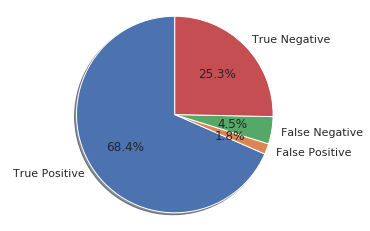

In [604]:
import matplotlib.pyplot as plt
cm = confusion_matrix
print(f"Correct prediction: {cm[0][0] + cm[1][1]}")
print(f"Incorrect prediction: {cm[0][1] + cm[1][0]}")
dtt ={'Labels':['True Positive','False Positive', 'False Negative', 'True Negative'],
      'values':[cm[0][0], cm[0][1], cm[1][0], cm[1][1]]}
cmx = pd.DataFrame(dtt)
fig1, ax1 = plt.subplots()
ax1.pie(dtt['values'],labels=dtt['Labels'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

The result is telling us that we have cm[0,0] + cm[1,1] correct predictions and cm[0,1] + cm[1,0]incorrect predictions.

### Compute Precision, Recall, F-measure and Support

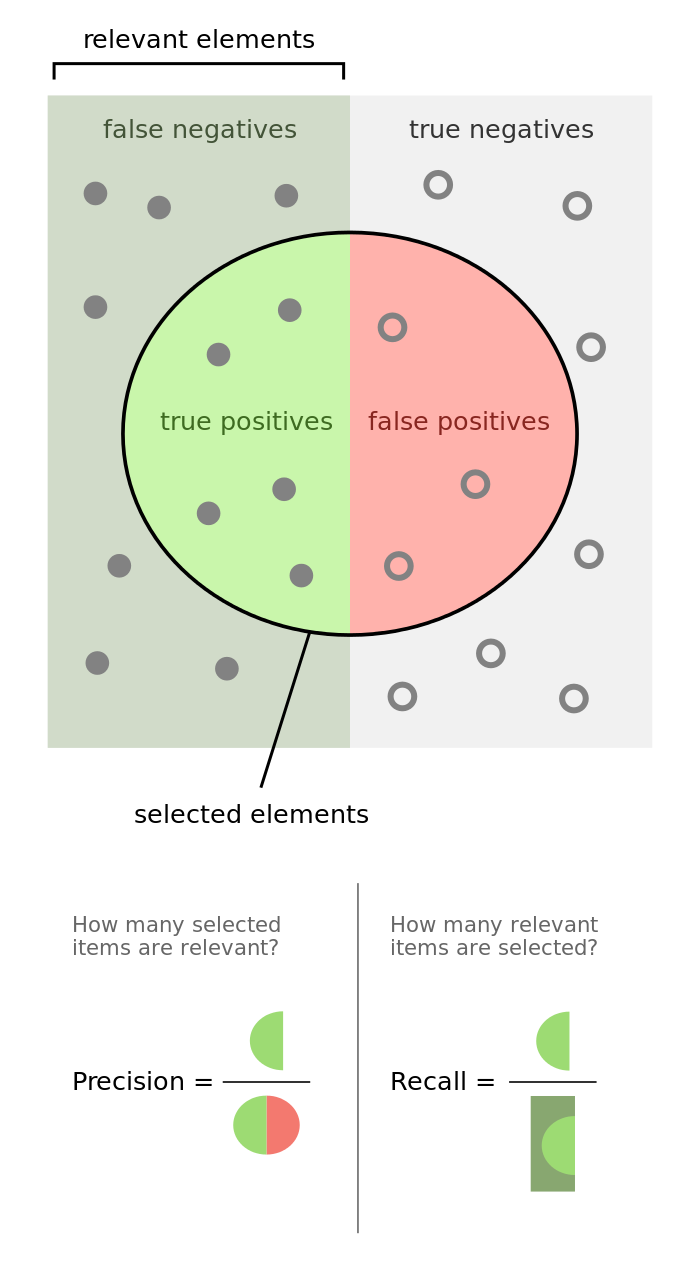

In [567]:
from IPython.display import Image
Image('pr.png')

- The precision is the ratio $TP / (TP + FP)$ where $TP$ is the number of true positives and $FP$ the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
$$precision\ =\ \frac{TP}{(TP + FP)})$$

- The recall is the ratio $TP / (TP + FN)$ where $TP$ is the number of true positives and $FN$ the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
$$Recall\ =\ \frac{TP}{(TP + FN)})$$

- The $F_\beta$ score can be interpreted as a weighted harmonic mean of the precision and recall, where an $F_\beta$ score reaches its best value at $1$ and worst score at $0$. The $F_\beta$ score weights recall more than precision by a factor of beta. $\beta == 1.0$ means recall and precision are equally important.

$$F_\beta\ =\ \frac{(1+\beta^2)TP}{(1+\beta^2)TP+ \beta^2FN + FP})$$
- The $F_1$ score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall). The $F_1$ score is also known as the Sørensen–Dice coefficient or Dice similarity coefficient (DSC).
$$F_1\ =\ \frac{2*Precision*Recall}{Precision + Recall}$$

- The $Support$ is the number of occurrences of each class in y_test.

In [568]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       922
         1.0       0.94      0.85      0.89       392

    accuracy                           0.94      1314
   macro avg       0.94      0.91      0.92      1314
weighted avg       0.94      0.94      0.94      1314



### ROC Curve from sklearn import metrics

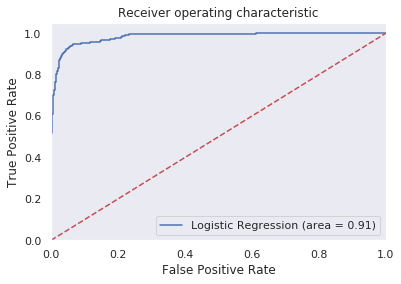

In [570]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.grid()
plt.show()

### 4.3 Predicted Probabilities

In [595]:
prob = logreg.predict_proba(X)[:,1]
data['prob'] = prob

# 5. Building An Estimator Using Linear Regression Model

### 5.1 Prepare the data

In [582]:
col20= ['Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions', 'Do_Not_Direct_Mail_Solicit',
       'Do_Not_Email', 'Do_Not_Telemarket', 'Desk', 'Executive_Chair',
       'Standard_Chair', 'Monitor', 'Printer', 'Computer', 'Insurance',
       'Toner', 'Office_Supplies', 'Number_of_Employees', 'Language_Arabic',
       'Language_Chinese', 'Language_English', 'Language_French',
       'Language_German', 'Language_Greek', 'Language_Hebrew',
       'Language_Hindi', 'Language_Italian', 'Language_Japanese',
       'Language_Pashto', 'Language_Polish', 'Language_Portuguese',
       'Language_Russian', 'Language_Spanish', 'Language_Thai',
       'Language_Vietnamese']
XX = data1[col20]
YY = data1['Campaign_Period_Sales']


### 5.2 Estimate Sales

In [596]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(XX, YY)
# print coefficients
list(zip(feature_cols, lm2.coef_))

[('Historical_Sales_Volume', 0.0003016909017033013),
 ('Number_of_Prior_Year_Transactions', 6.174488386428838),
 ('Do_Not_Direct_Mail_Solicit', 190.77415103763428),
 ('Do_Not_Email', 28.182199669348996),
 ('Do_Not_Telemarket', -98.75759499985986),
 ('Desk', 55.2727487366324),
 ('Executive_Chair', 179.34676912830463),
 ('Standard_Chair', 255.88938318961115),
 ('Monitor', 692.7578723276936),
 ('Printer', 167.5800346146384),
 ('Computer', 502.60531528361514),
 ('Insurance', 122.05814365421922),
 ('Toner', 145.38118076995522),
 ('Office_Supplies', -1501.4418516200608),
 ('Number_of_Employees', 0.4827520584314579),
 ('Language_Arabic', 52.31044329527001),
 ('Language_Chinese', 81.04516659671432),
 ('Language_English', 170.34390000913677),
 ('Language_French', 50.64119042827005),
 ('Language_German', 170.32678139743555),
 ('Language_Greek', 159.8588245800239),
 ('Language_Hebrew', 15.661104529885355),
 ('Language_Hindi', -33.05968320427045),
 ('Language_Italian', -33.389370969149795),
 ('Lan

In [597]:
estimate = lr.predict(XX)
data['est'] = estimate

# 6. Financial Analyis

### 6.1 Profit Calculation

$$E(Profit)\ =\ 0.2*prob(Sale)*Est(Transaction Size)-\$5*Prob(Sale)-*\$40$$

In [618]:
fin = data[['Customer_Number','prob', 'est']]
fin['profit'] = 0.2*fin['prob']*fin['est']- 5*fin['prob']-40

In [619]:
fin.head()

,Customer_Number,prob,est,profit
0,"86,734.0000",0.0704,348.6419,-35.4442
1,"97,098.0000",0.0235,369.1171,-38.3824
2,"100,836.0000",0.0228,499.7732,-37.8389
4,"127,914.0000",0.0241,"1,863.3666",-31.1310
5,"148,529.0000",0.0805,388.9342,-34.1410


In [ ]:
fin = data[['Customer_Number','prob', 'est']]
fin['profit'] = 0.2*fin['prob']*fin['est']- 5*fin['prob']-40

fin['decile']=pd.qcut(fin['profit'],10,labels=False)
fin['count'] = 1
cut = fin['decile']
cust = fin[['decile','count']]
prof = fin[['decile','profit']]


cust = cust.groupby(['decile']).sum().reset_index()
prof = prof.groupby(['decile']).mean().reset_index()

lift = cust[['decile','count']]
lift.columns = ['decile','Number of Customers']
lift['profit per customer'] = prof['profit']
decil =[i for i in range(1,11)]
lift['decile'] = decil
lift = lift.sort_values(by='decile',ascending=False)

### 6.2 Lift/Gain Chart

In [633]:
fin['decile']=pd.qcut(fin['profit'],10,labels=False)
fin['count'] = 1
cut = fin['decile']
cust = fin[['decile','count']]
prof = fin[['decile','profit']]


cust = cust.groupby(['decile']).sum().reset_index()
prof = prof.groupby(['decile']).mean().reset_index()

lift = cust[['decile','count']]
lift.columns = ['decile','Number of Customers']
lift['profit per customer'] = prof['profit']
decil =[i for i in range(1,11)]
lift['decile'] = decil
lift = lift.sort_values(by='decile',ascending=False)
lift

,decile,Number of Customers,profit per customer
9,10,438,466.7929
8,9,438,124.9694
7,8,438,25.0765
6,7,438,-18.3145
5,6,437,-33.0483
4,5,438,-38.1078
3,4,438,-39.2515
2,3,438,-39.6004
1,2,438,-39.8062
0,1,438,-40.0626


### 6.3 Concluding Remarks

- ***The profitable customers are those in deciles 10, 9, and 8. Hence, the company should focus on these customers in its future telemarketing efforts.***

# <font color='green'>Appendix: The Script Altogether</font>

In [640]:
# Libraries and Packages
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
# ------------------------------------------------------------------------
# Dataset
# Read in all sheets in the source excel file
sheets = pd.read_excel('telemarketingOfficeSupplyCampaign Results.xlsx',\
                       sheet_name =['Campaign Results', 'Data Dictionary'])
data = sheets['Campaign Results']
description = sheets['Data Dictionary']
columns =['Customer_Number', 'Campaign_Period_Sales', 'Historical_Sales_Volume',
       'Date_of_First_Purchase', 'Number_of_Prior_Year_Transactions',
       'Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 'Do_Not_Telemarket',
       'Repurchase_Method', 'Last_Transaction_Channel', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language']
data.columns =columns
# ------------------------------------------------------------------------
# Clean Dataset
data = data[(data['Campaign_Period_Sales']>0) == True]
data['Language'] = data['Language'].fillna(data['Language'].mode()[0])
data['Number_of_Employees'] = data['Number_of_Employees'].\
            fillna(data['Number_of_Employees'].mode()[0])
# Handle whitespaces
# Number_of_Employees has 4379-3355 white-space cells
data['Number_of_Employees'] = data['Number_of_Employees'].replace(r'^\s*$',\
                                                np.nan, regex=True)
# Replace whitespaces with average numbe rof emplyees
# This is just an example, you can employ another strategy or drop it
lst = data['Number_of_Employees'].tolist()

lst1 = []
lst2 = []
for ls in lst:
    if type(ls) == str:
        tmp = ls.split('-')
        if len(tmp)>1:
            lst1.append((int(tmp[0]) + int(tmp[1]))/2) 
            lst2.append((int(tmp[0]) + int(tmp[1]))/2) 
        else:        
            lst1.append(int(ls[0]))  
            lst2.append(int(ls[0]))  
    else:
        lst1.append(ls)
mean = np.mean(lst2)

data['Number_of_Employees'] = lst1
data['Number_of_Employees'] = data['Number_of_Employees'].fillna(mean)
data['Insurance']=data['Insurance'].apply(lambda x: '0' if x == 'YY' else x)
# ------------------------------------------------------------------------
# Encoding Categorical Data
#Responses
data.Desk = data.Desk.apply(lambda x:\
          1.0 if x == 'Y' else(0 if x=='N' else x))
data.Executive_Chair = data.Executive_Chair.apply(lambda x:\
                 1.0 if x == 'Y' else(0.0 if x=='N' else x))   
data.Standard_Chair = data.Standard_Chair.apply(lambda x:\
                    1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Monitor = data.Monitor.apply(lambda x:\
             1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Printer = data.Printer.apply(lambda x:\
             1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Computer = data.Computer.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Insurance = data.Insurance.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Toner = data.Toner.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))
data.Office_Supplies = data.Office_Supplies.apply(lambda x:\
              1.0 if x == 'Y' else(0.0 if x == 'N' else x))

# Create dummy variables for languages
fields=['Language']
for var in fields:
    field_lst ='var'+'_'+var
    field_lst = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(field_lst)
    data = data1
# ------------------------------------------------------------------------ 
# Data Preprocessing
col4 = ['Campaign_Period_Sales', 'Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions','Do_Not_Direct_Mail_Solicit', 'Do_Not_Email', 
        'Do_Not_Telemarket', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language_Arabic', 'Language_Chinese','Language_English', 'Language_French', 'Language_German',
       'Language_Greek', 'Language_Hebrew', 'Language_Hindi',
       'Language_Italian', 'Language_Japanese', 'Language_Pashto',
       'Language_Polish', 'Language_Portuguese', 'Language_Russian',
       'Language_Spanish', 'Language_Thai', 'Language_Vietnamese']
data1 = data[col4]
data1 = data1.astype(np.float64)
data1['Insurance'] = data1['Insurance'].fillna(1.0)
col5 = ['Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions','Do_Not_Direct_Mail_Solicit', 
        'Do_Not_Email', 'Do_Not_Telemarket', 'Desk',
       'Executive_Chair', 'Standard_Chair', 'Monitor', 'Printer', 'Computer',
       'Insurance', 'Toner', 'Office_Supplies', 'Number_of_Employees',
       'Language_Arabic', 'Language_Chinese','Language_English', 'Language_French', 'Language_German',
       'Language_Greek', 'Language_Hebrew', 'Language_Hindi',
       'Language_Italian', 'Language_Japanese', 'Language_Pashto',
       'Language_Polish', 'Language_Portuguese', 'Language_Russian',
       'Language_Spanish', 'Language_Thai', 'Language_Vietnamese']
X = data1[col5]
Y = data1['Campaign_Period_Sales']

# Binarize
data1.columns = col4
data2 = data1[col4]
X1 = preprocessing.scale(data2[col5])
transformer = Binarizer().fit(X1)  # fit does nothing.
X1 = transformer.transform(X1)
y1 =[]
for i in range(X1.shape[0]):
    y1.append(X1[i].sum())
meant = np.mean(y1)
Y1 = np.array(y1)

from sklearn.preprocessing import Binarizer 
#data_set.iloc[:, 1].values 
Y1 = Y1.reshape(1,-1)
binarizer = Binarizer(meant) 
Y = binarizer.fit_transform(Y1)
data1['y'] = Y[0]
Y = data1['y']

# Split dataset into training and testing
X = data1[col5]
X = preprocessing.scale(X)
Y = data1['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# ------------------------------------------------------------------------ 
# Build Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Logit Predicted probabilities
prob = logreg.predict_proba(X)[:,1]
data['prob'] = prob

# ------------------------------------------------------------------------ 
# Building An Estimator Using Linear Regression Model
col20= ['Historical_Sales_Volume',
       'Number_of_Prior_Year_Transactions', 'Do_Not_Direct_Mail_Solicit',
       'Do_Not_Email', 'Do_Not_Telemarket', 'Desk', 'Executive_Chair',
       'Standard_Chair', 'Monitor', 'Printer', 'Computer', 'Insurance',
       'Toner', 'Office_Supplies', 'Number_of_Employees', 'Language_Arabic',
       'Language_Chinese', 'Language_English', 'Language_French',
       'Language_German', 'Language_Greek', 'Language_Hebrew',
       'Language_Hindi', 'Language_Italian', 'Language_Japanese',
       'Language_Pashto', 'Language_Polish', 'Language_Portuguese',
       'Language_Russian', 'Language_Spanish', 'Language_Thai',
       'Language_Vietnamese']
XX = data1[col20]
YY = data1['Campaign_Period_Sales']

# Estimate 
lr = LinearRegression()
lr.fit(XX, YY)
estimate = lr.predict(XX)
data['est'] = estimate
# ------------------------------------------------------------------------ 
#Financial Analyis
fin = data[['Customer_Number','prob', 'est']]
fin['profit'] = 0.2*fin['prob']*fin['est']- 5*fin['prob']-40

fin['decile']=pd.qcut(fin['profit'],10,labels=False)
fin['count'] = 1
cut = fin['decile']
cust = fin[['decile','count']]
prof = fin[['decile','profit']]


cust = cust.groupby(['decile']).sum().reset_index()
prof = prof.groupby(['decile']).mean().reset_index()

lift = cust[['decile','count']]
lift.columns = ['decile','Number of Customers']
lift['profit per customer'] = prof['profit']
decil =[i for i in range(1,11)]
lift['decile'] = decil
lift = lift.sort_values(by='decile',ascending=False)
con ="""The profitable customers are those in deciles 10, 9, and 8 as shown in the table below.
Hence, the company should focus on these customers in its future telemarketing efforts."""
print(con)
lift

The profitable customers are those in deciles 10, 9, and 8 as shown in the table below.
Hence, the company should focus on these customers in its future telemarketing efforts.


,decile,Number of Customers,profit per customer
9,10,438,466.7929
8,9,438,124.9694
7,8,438,25.0765
6,7,438,-18.3145
5,6,437,-33.0483
4,5,438,-38.1078
3,4,438,-39.2515
2,3,438,-39.6004
1,2,438,-39.8062
0,1,438,-40.0626


                                    ~END~